In [43]:
import tkinter as tk
from tkinter import messagebox
from tkinter import filedialog
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

top = tk.Tk()
top.geometry("100x100")
   
def btn_quit():
    top.destroy()

def btn_open():
    
    top.filename =  filedialog.askopenfilename(initialdir = "/home/brek/Downloads/gis_data/US_Cell_Towers",title = "Select file",filetypes = (("csv files","*.csv"),("all files","*.*")))

btn_open = tk.Button(top, text = "Open", command = btn_open, borderwidth = 1).grid(row=1, column=1)
btn_quit = tk.Button(top, text = "Quit", command = btn_quit, borderwidth = 1).grid(row=2, column=1)



top.mainloop()

(35, 43)

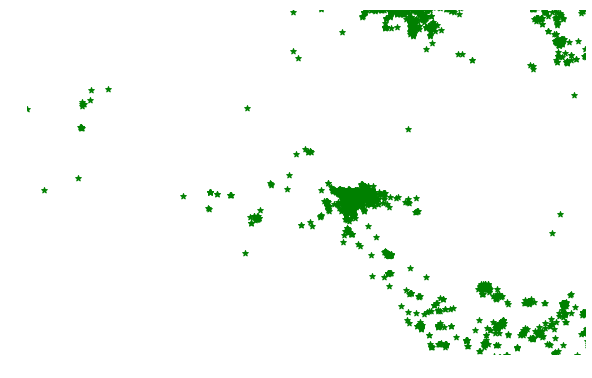

In [88]:
#1. Open the CSV file with pandas
df = pd.read_csv("/home/brek/Downloads/gis_data/US_Cell_Towers/All_USA_TOWERS.csv")
df.head()

#2. feed lat/lon to shapley to create points
points = df.apply(lambda row: Point(float(row.Longitude), float(row.Latitude)), axis=1)

#3. Original dataframe + geometry = geodataframe
all_towers = gpd.GeoDataFrame(df, geometry=points)

#4. Set the coordinate system in this example Lat/Lon
all_towers.crs = {'init': 'epsg:4326'}

#5. Plot the results
all_towers.to_crs(epsg=5071)
ax = all_towers.plot(figsize=(10,10), marker='*', color='green')
ax.axis('off')
ax.set_xlim([-98, -85])
ax.set_ylim([35, 43])

In [63]:
# Open a .SHP file
states = gpd.read_file("/home/brek/Downloads/gis_data/US_STATES/US_STATES.shp")
states
states.crs = {'init': 'epsg:4326'}

(35, 43)

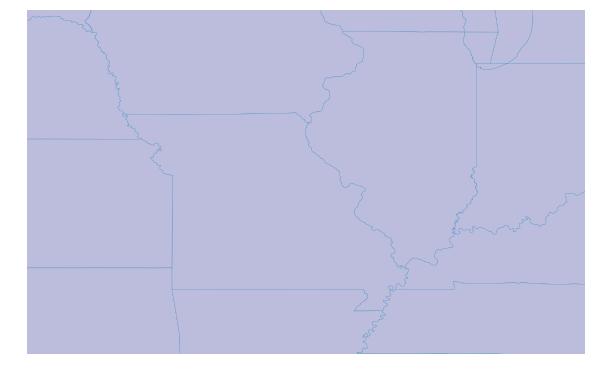

In [89]:
states.to_crs(epsg=5071)
ax = states.plot(figsize=(10,10), color='#bcbddc' , edgecolor='#3182bd', linewidth=0.25 )
ax.axis('off')
ax.set_xlim([-98, -85])
ax.set_ylim([35, 43])